In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
import zipline
from zipline.api import order_target, record, symbol, symbols, order_target_percent, schedule_function, date_rules, set_benchmark, set_cancel_policy
import random
from arch import arch_model
import sys  
sys.path.insert(0, '/Users/cemalarican/Desktop/THESIS/')
from pipeLine import Pipeline
pipe_line = Pipeline(start_date='2014-01-01', end_date='2015-01-01', field='adj_close').make_pipeline()
pipe_line.shape

file_path = '/Users/cemalarican/Desktop/1000 GARCHES'

In [2]:
pipe_line = Pipeline(start_date='2014-01-01', end_date='2018-01-01', field='adj_close').make_pipeline()
pipe_line.shape

(1007, 11819)

In [3]:
import statsmodels.api as sm
from statsmodels import regression
import math

def get_price(ticker, start, end, pipeline=pipe_line):
    return pd.Series(data=pipeline.loc[start:end].adj_close[ticker]).rename(ticker, inplce=True)


In [4]:
coint_pairs = pd.read_csv('/Users/cemalarican/Desktop/THESIS/PART 1/coint_pairs_to_investigate.csv')
coint_pairs

,stock1,stock2,constant,coeff,stat,p-value
0,MZZ,SMDD,1.721706e+01,0.653397,NON-STAT,6.567685e-02
1,EDV,UBT,1.901886e+01,1.156738,NON-STAT,1.173429e-01
2,IVV,IWB,-8.024626e+00,1.863519,STAT,2.437148e-02
3,DGL,SGOL,-3.365232e+00,3.555141,STAT,2.326552e-02
4,PHDG,VQT,-7.188207e-01,0.170467,STAT,5.418133e-07
5,IWV,SCHB,4.985746e+00,2.350143,NON-STAT,1.634537e-01
6,IWB,SPY,4.051654e+00,0.538618,STAT,1.627052e-02
7,IWB,SSO,4.734292e+01,0.912445,STAT,1.948852e-03
8,CURE,RXL,-1.056283e+01,0.340761,STAT,7.737721e-03
9,EUSA,VV,3.657650e-01,0.467233,STAT,1.498560e-13


In [ ]:
list_of_sims = []
for _ in range(1000):
    stock1 = coint_pairs.iloc[2][0]
    stock2 = coint_pairs.iloc[2][1]
    beta = round(coint_pairs.iloc[2][3], 2)
    stat = coint_pairs.iloc[2][4]

    spread = get_price(ticker=stock1, start='2014-01-01' , end='2015-01-01') - beta*get_price(ticker=stock2,start='2014-01-01' , end='2015-01-01')
    spread_mean = spread.mean()
    spread_std = spread.std()

    spread_4_days = list(spread.iloc[-4:])
    current_spread_series = [i for i in spread_4_days]
    zscore_series = [(i-spread_mean)/spread_std for i in spread_4_days]

    # pairs_sim=pd.DataFrame()

    def initialize(context):
        context.p1 = symbols(stock1, stock2)
        context.count_days = 0

        # KEEPING TRACK IF WE GO LONG OR SHORT ON THE SPREAD
        context.long_on_spread = False
        context.shorting_on_spread = False


    def handle_data(context, data):
        portfolio_value = context.portfolio.portfolio_value
        context.count_days += 1

        pair1 = context.p1
        s1 = pair1[0]
        s2 = pair1[1]

        w2 = round((1/(beta+1)),2)
        w1 = 1 - w2

        current_spread = data.current(pair1[0], 'close') - beta* data.current(pair1[1], 'close')
        current_spread_series.append(current_spread)

        if spread_std > 0:

            zscore = (current_spread - spread_mean) / spread_std
            zscore_series.append(zscore)

            # GARCH(1,1)
            garch_model = arch_model(zscore_series, vol='GARCH', p=1, q=1, mean='constant', dist='Normal').fit(options={'maxiter':5}, disp='off')
            parameters = garch_model.params
            mu = parameters[0]
            alpha_g = parameters[2]
            beta_g = parameters[3]
            stat_g = alpha_g + beta_g

            n = len(current_spread_series)

            e = np.random.normal(0, 1, n)
            epsilon_t = garch_model.conditional_volatility * e

            garch_zscore = mu + epsilon_t

            current_garch_zscore = garch_zscore[-1]

            # ENTRY CASE 1
            if current_garch_zscore > 1.0 and not context.shorting_on_spread:
                order_target_percent(s1, -w1)
                order_target_percent(s2, w2)

                context.shorting_spread = True
                context.long_on_spread = False


            # ENTRY CASE 2:
            elif current_garch_zscore < -1.0 and not context.long_on_spread:
                order_target_percent(s1, w1)
                order_target_percent(s2, -w2)
                context.shorting_spread = False
                context.long_on_spread = True


            # STOP POSITION    
            elif abs(current_garch_zscore) >= 3:
                order_target_percent(s1, 0)
                order_target_percent(s2, 0)
                context.shorting_spread = False
                context.long_on_spread = False


            # EXIT STRATEGY - REACHING MEAN REVERSION
            elif abs(current_garch_zscore) <= 0.05:
                order_target_percent(s1, 0)
                order_target_percent(s2, 0)
                context.shorting_spread = False
                context.long_on_spread = False


            record('zscore', zscore)  
            record(por=portfolio_value)
            record('long_spread', context.long_on_spread )
            record('short_spread', context.shorting_on_spread )
            record('STATG', stat_g)
            record('ZGARCH', current_garch_zscore)


    start_time = datetime(2015, 1, 1, tzinfo=pytz.UTC)
    end_time = datetime(2016, 1, 1, tzinfo=pytz.UTC)

    perf_Algo = zipline.run_algorithm(
        start=start_time,
        end=end_time,
        initialize=initialize,
        capital_base=100000,
        handle_data=handle_data,
        data_frequency='daily',
        bundle="eod-csvdir")

    list_of_sims.append(perf_Algo.portfolio_value.iloc[-1])



In [ ]:
list_of_sims

In [ ]:
normal_re = pd.read_csv('/Users/cemalarican/Desktop/THESIS/PART 1/YEAR/pair_sim_2015.csv')

In [ ]:
normal_re['IVV vs IWB:STAT'].iloc[-1]

In [ ]:
pd.Series(list_of_sims).hist()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# figure, ax = plt.subplots(figsize=(12, 12))
plt.figure(figsize=(12, 12))
plt.hist(pd.Series(list_of_sims), bins=20, color='c', alpha=0.65, edgecolor='k', label='1000 GARCH Simulations: IVV vs IWB')
plt.axvline(normal_re['IVV vs IWB:STAT'].iloc[-1], color='red', ls='--', label='Basic Model performance: IVV vs IWB')
plt.legend(loc='best')
plt.title('1000 simulations of GARCH against perfomance of Basic model')
plt.savefig('/Users/cemalarican/Desktop/1000 GARCHES/plot.png')



In [11]:
from arch import arch_model

In [12]:
def linreg(x,y):
    x = sm.add_constant(x)
    m = sm.OLS(endog=y, exog=x, missing='drop').fit()
    return m

####

In [13]:
x_t = spread[1:len(spread)]
x_t_1 = spread[0:len(spread)-1]
print('length x_t : {}'.format(len(x_t)))
print('length x_t_1 : {} '.format(len(x_t_1)))

lin_reg = linreg(x=x_t_1.reset_index(drop=True), y=x_t.reset_index(drop=True))
lin_reg.params

length x_t : 1006
length x_t_1 : 1006 


const   -0.163846
0        0.979548
dtype: float64

In [14]:
resid = lin_reg.resid

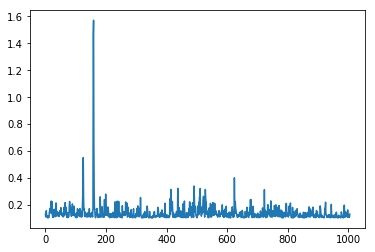

In [15]:
garch = arch_model(resid, vol='GARCH', p=1, q=1, mean='constant', dist='normal').fit(disp='off')
con_vol =garch.conditional_volatility
con_vol.plot()


In [16]:
d = coint_pairs.iloc[2]
stock1 = get_price(ticker=d[0], start='2014-01-01', end='2018-01-01')
stock2 = get_price(ticker=d[1], start='2014-01-01', end='2018-01-01')
spread = stock1 - d[3]*stock2
zscore = (spread - spread.mean())/spread.std()

In [17]:
spread

time
2014-01-02   -7.751473
2014-01-03   -7.788870
2014-01-06   -7.664434
2014-01-07   -7.831713
2014-01-08   -7.826614
2014-01-09   -7.880331
2014-01-10   -7.839199
2014-01-13   -7.839175
2014-01-14   -7.931327
2014-01-15   -7.952755
2014-01-16   -7.985730
2014-01-17   -7.963625
2014-01-21   -8.012586
2014-01-22   -8.164216
2014-01-23   -8.025152
2014-01-24   -7.836088
2014-01-27   -7.734087
2014-01-28   -7.891506
2014-01-29   -7.713683
2014-01-30   -7.998940
2014-01-31   -7.931614
2014-02-03   -7.652457
2014-02-04   -7.691225
2014-02-05   -7.794575
2014-02-06   -7.799697
2014-02-07   -7.872474
2014-02-10   -7.984668
2014-02-11   -7.982647
2014-02-12   -8.116599
2014-02-13   -8.296114
                ...   
2017-11-16   -8.772412
2017-11-17   -8.878185
2017-11-20   -8.951503
2017-11-21   -9.000492
2017-11-22   -8.967387
2017-11-24   -9.014311
2017-11-27   -8.983443
2017-11-28   -8.947785
2017-11-29   -8.984940
2017-11-30   -8.739919
2017-12-01   -8.948037
2017-12-04   -8.893608
2017-1

In [18]:
print('Parameters: Omega, Alpha, Beta')
print("omega: {}".format(garch.params[1]))
print("alpha: {}".format(garch.params[2]))
print("beta: {}".format(garch.params[3]))
print('statioanry? : {}'.format(garch.params[2] + garch.params[3] ))

Parameters: Omega, Alpha, Beta
omega: 0.008954248655942595
alpha: 0.4937293030012865
beta: 0.17499656680375938
statioanry? : 0.6687258698050459


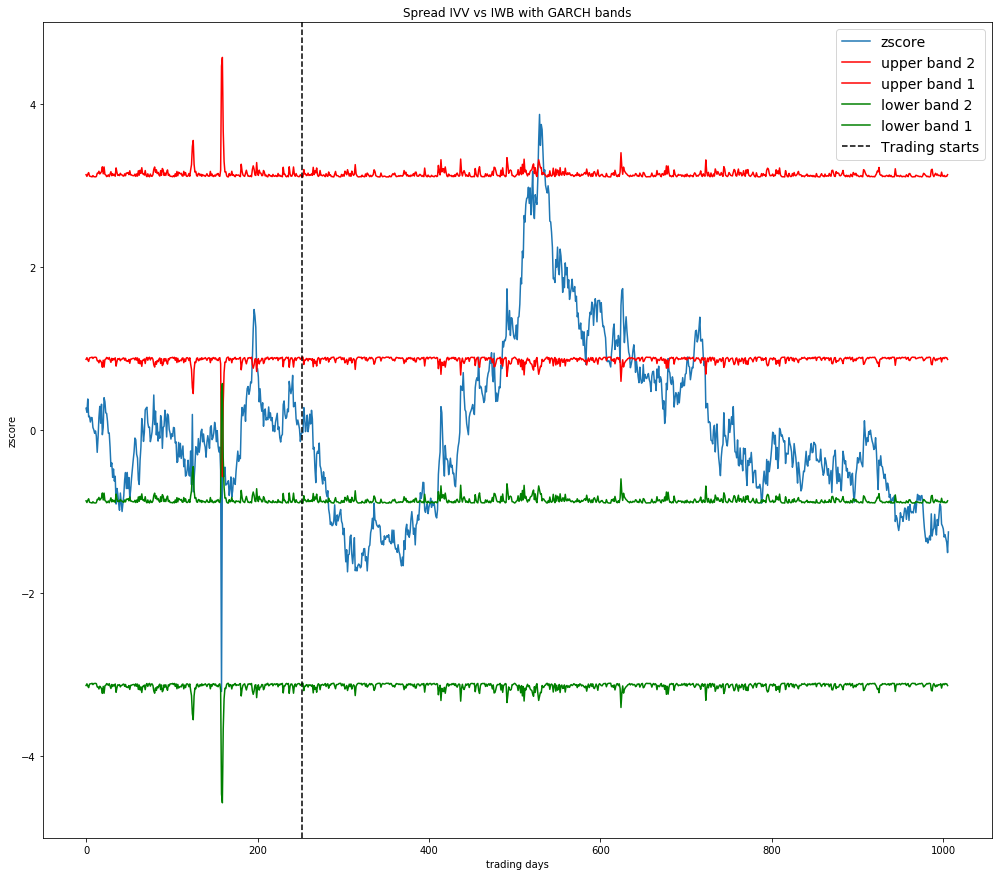

In [28]:
fig, ax = plt.subplots(figsize=(17, 15))
plt.ylim(-5, 5)
ax.plot(zscore.reset_index(drop=True), label='zscore')

ax.plot(3+con_vol, c='red', label='upper band 2')
ax.plot(-1*con_vol+1, c='red', label='upper band 1')

ax.plot(-3-con_vol, c='green', label='lower band 2')
ax.plot(1*con_vol-1, c='green', label='lower band 1')

ax.set_ylabel('zscore')
ax.set_xlabel('trading days')

plt.axvline(x=252, ls='--', c='black', label='Trading starts')
plt.title('Spread IVV vs IWB with GARCH bands')
plt.legend(loc='best', prop={'size': 14})
plt.savefig('/Users/cemalarican/Desktop/1000 GARCHES/trading_ex_garch.png')